In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gdp_data = pd.read_csv('/Users/elorm/Documents/Repos/Datasets/all_data.csv')
print(gdp_data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [4]:
print(gdp_data.tail())

     Country  Year  Life expectancy at birth (years)           GDP
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10


In [7]:
gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [12]:
zimbabwe = gdp_data[gdp_data['Country'] == 'Zimbabwe']

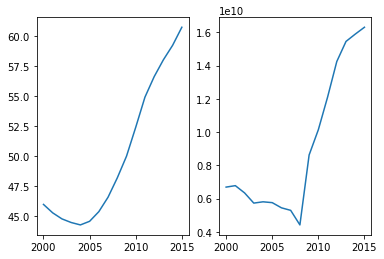

In [22]:
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.plot(zimbabwe['Year'], zimbabwe['Life expectancy at birth (years)'])

plt.subplot(1,2,2)
plt.plot(zimbabwe['Year'], zimbabwe['GDP'])
plt.show()